<a href="https://colab.research.google.com/github/oecorrechag/neural-network-tensorflow/blob/main/class%2023%20-%20save_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIMS

Ejemplo de red neuronal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import string
import pandas as pd
import time
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## Cargar el train y test

In [3]:
# !wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
#     -O sign-language-img.zip

In [4]:
# Descomprimimos
local_zip = '/tmp/sign-language-img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/sign-language-img')
zip_ref.close()

In [5]:
train_dir = "/tmp/sign-language-img/Train"
test_dir = "/tmp/sign-language-img/Test"

## Data Generators

In [6]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


## Definir las clases

Recordar que hay dos letras que no tenemos J y Z

In [8]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

## Generate model

In [9]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

In [10]:
model_base = get_model()
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


## Training

Entrenemos durante 20 épocas. Esto puede tardar unos minutos en ejecutarse.

In [11]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [12]:
inicio = time.time()

history = model_base.fit(
    train_generator,
    epochs= 10,
    validation_data = validation_generator
)

fin = time.time()

Epoch 1/20
215/215 [==============================] - 11s 49ms/step - loss: 2.2425 - accuracy: 0.3400 - val_loss: 1.6923 - val_accuracy: 0.4632
Epoch 2/20
215/215 [==============================] - 9s 40ms/step - loss: 1.2407 - accuracy: 0.6311 - val_loss: 1.3722 - val_accuracy: 0.5768
Epoch 3/20
215/215 [==============================] - 9s 40ms/step - loss: 0.8852 - accuracy: 0.7311 - val_loss: 1.2003 - val_accuracy: 0.6253
Epoch 4/20
215/215 [==============================] - 10s 45ms/step - loss: 0.6728 - accuracy: 0.7994 - val_loss: 1.1745 - val_accuracy: 0.6288
Epoch 5/20
215/215 [==============================] - 9s 43ms/step - loss: 0.5099 - accuracy: 0.8554 - val_loss: 1.1017 - val_accuracy: 0.6547
Epoch 6/20
215/215 [==============================] - 9s 42ms/step - loss: 0.4108 - accuracy: 0.8825 - val_loss: 0.9625 - val_accuracy: 0.7074
Epoch 7/20
215/215 [==============================] - 8s 39ms/step - loss: 0.3297 - accuracy: 0.9084 - val_loss: 1.0222 - val_accuracy: 0.71

In [13]:
print(fin - inicio)

211.50948214530945


## Testing

In [14]:
results = model_base.evaluate(test_generator)

57/57 [==============================] - 2s 36ms/step - loss: 1.3061 - accuracy: 0.7355


## Summary model

In [15]:
def visualizacion_resultados(history):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1,2)
    train_acc = history.history["accuracy"]
    train_loss = history.history["loss"]
    val_acc = history.history["val_accuracy"]
    val_loss = history.history["val_loss"]
    fig.set_size_inches(16, 9)

    ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
    ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
    ax[0].set_title("Entrenamiento & validación accuracy")
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
    ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
    ax[1].set_title("Entrenamiento & validación Loss")
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    plt.show()

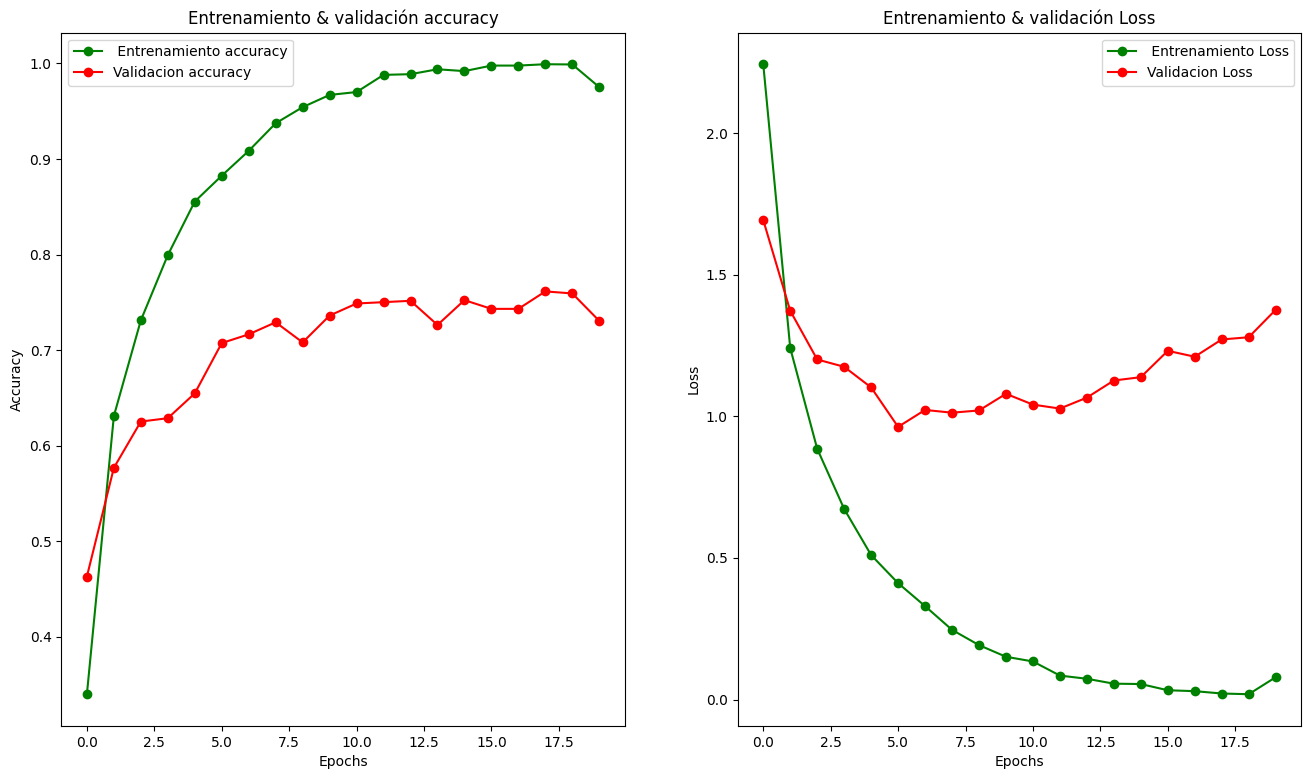

In [16]:
visualizacion_resultados(history)

### Save architecture and weights

In [17]:
config_dict = model_base.get_config()
config_dict

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28, 1),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'uni

### Load architecture and weights

In [29]:
checkpoint_path = "model_checpoints_complete"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = False,
    monitor = "val_accuracy",
    save_best_only = True,
    verbose = 1
)

In [30]:
model_complete = get_model()
model_complete.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs = 10,
    callbacks = [checkpoint_weighs],
    validation_data = validation_generator
)

Epoch 1/10
214/215 [============================>.] - ETA: 0s - loss: 2.1896 - accuracy: 0.3541
Epoch 1: val_accuracy improved from -inf to 0.49614, saving model to model_checpoints_complete


215/215 [==============================] - 11s 48ms/step - loss: 2.1862 - accuracy: 0.3551 - val_loss: 1.6868 - val_accuracy: 0.4961
Epoch 2/10
214/215 [============================>.] - ETA: 0s - loss: 1.2425 - accuracy: 0.6154
Epoch 2: val_accuracy improved from 0.49614 to 0.59930, saving model to model_checpoints_complete


215/215 [==============================] - 11s 50ms/step - loss: 1.2415 - accuracy: 0.6156 - val_loss: 1.2881 - val_accuracy: 0.5993
Epoch 3/10
214/215 [============================>.] - ETA: 0s - loss: 0.8957 - accuracy: 0.7213
Epoch 3: val_accuracy improved from 0.59930 to 0.62246, saving model to model_checpoints_complete


215/215 [==============================] - 10s 47ms/step - loss: 0.8950 - accuracy: 0.7214 - val_loss: 1.1714 - val_accuracy: 0.6225
Epoch 4/10
214/215 [============================>.] - ETA: 0s - loss: 0.6759 - accuracy: 0.7923
Epoch 4: val_accuracy improved from 0.62246 to 0.68351, saving model to model_checpoints_complete


215/215 [==============================] - 12s 57ms/step - loss: 0.6761 - accuracy: 0.7921 - val_loss: 1.0382 - val_accuracy: 0.6835
Epoch 5/10
215/215 [==============================] - ETA: 0s - loss: 0.5288 - accuracy: 0.8411
Epoch 5: val_accuracy did not improve from 0.68351
215/215 [==============================] - 10s 45ms/step - loss: 0.5288 - accuracy: 0.8411 - val_loss: 1.0289 - val_accuracy: 0.6730
Epoch 6/10
214/215 [============================>.] - ETA: 0s - loss: 0.4083 - accuracy: 0.8819
Epoch 6: val_accuracy improved from 0.68351 to 0.71088, saving model to model_checpoints_complete


215/215 [==============================] - 12s 55ms/step - loss: 0.4079 - accuracy: 0.8821 - val_loss: 0.9851 - val_accuracy: 0.7109
Epoch 7/10
214/215 [============================>.] - ETA: 0s - loss: 0.3096 - accuracy: 0.9149
Epoch 7: val_accuracy improved from 0.71088 to 0.71158, saving model to model_checpoints_complete


215/215 [==============================] - 10s 47ms/step - loss: 0.3100 - accuracy: 0.9148 - val_loss: 0.9519 - val_accuracy: 0.7116
Epoch 8/10
215/215 [==============================] - ETA: 0s - loss: 0.2309 - accuracy: 0.9429
Epoch 8: val_accuracy improved from 0.71158 to 0.71860, saving model to model_checpoints_complete


215/215 [==============================] - 10s 45ms/step - loss: 0.2309 - accuracy: 0.9429 - val_loss: 0.9538 - val_accuracy: 0.7186
Epoch 9/10
214/215 [============================>.] - ETA: 0s - loss: 0.1842 - accuracy: 0.9563
Epoch 9: val_accuracy improved from 0.71860 to 0.73333, saving model to model_checpoints_complete


215/215 [==============================] - 11s 51ms/step - loss: 0.1839 - accuracy: 0.9565 - val_loss: 0.9642 - val_accuracy: 0.7333
Epoch 10/10
215/215 [==============================] - ETA: 0s - loss: 0.1313 - accuracy: 0.9743
Epoch 10: val_accuracy did not improve from 0.73333
215/215 [==============================] - 13s 63ms/step - loss: 0.1313 - accuracy: 0.9743 - val_loss: 1.0764 - val_accuracy: 0.7004


### Almacenar infraestructura y peso manual

In [31]:
model_complete.save("saved_model_complete/mymodel")

## Cargamos nuestro modelo completo

In [32]:
model_complete3 = tf.keras.models.load_model("saved_model_complete/mymodel")

In [33]:
model_complete3.evaluate(test_generator)

57/57 [==============================] - 2s 35ms/step - loss: 0.9997 - accuracy: 0.7157


[0.9996505975723267, 0.7156999707221985]

In [34]:
model_complete.evaluate(test_generator)

57/57 [==============================] - 2s 42ms/step - loss: 0.9997 - accuracy: 0.7157


[0.9996505975723267, 0.7156999707221985]

## Usar el formato .h5

In [ ]:
# !pip install pyyaml h5py

In [35]:
model_complete3.save("my_model.h5")

In [40]:
model_complete4 = tf.keras.models.load_model("my_model.h5")
model_complete4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


In [28]:
print('Ok_')

Ok_
